In [1]:
#Wranlging
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Hypotheis testing
from scipy.stats import ttest_1samp
from scipy import stats

#Classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
#importing the data set
data=pd.read_csv("C:/Users/girish narayan.s/Documents/r project/IDS DATASET.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


In [4]:
#step 1 data info
data.head()
data.shape

(2200, 14)

In [5]:
#step 2 data cleaning
#replacing the null values with NAN and also removing an empty column
data


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [6]:
data= data.replace('0',np.nan) #reaplcing all the nan with zeros
data = data.dropna(axis="columns", how="any")
print(data.shape)
data


(2200, 13)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,16,78.55,2012


In [7]:
#the data set now only has 13 columns with the empty column removed


In [8]:
#step 3 data visualization
#graph 1 comparing citations,teaching,research and total score in same frame
#We comparing citations,teaching,research and total score in same frame
top_100 = data.iloc[:100,:]
trace0 = go.Scatter(
x = top_100.world_rank,
y = top_100.quality_of_faculty,
mode = "lines",
name = "teaching",
marker = dict(color = 'rgba(12, 12, 140,.4)'),
text = top_100.institution
)
trace1 = go.Scatter(
x = top_100.world_rank,
y = top_100.citations,    
mode ="lines + markers",
name = "citation",
marker = dict(color = "rgba(155,98,160,.6)"),
xaxis = "x2",
yaxis = "y2",
text = top_100.institution
)
trace2 = go.Scatter(
x = top_100.world_rank,
y= top_100.score,
mode = "lines",
name = "total",
marker = {"color":"rgba(36,120,153,.4)"},
xaxis = "x3",
yaxis = "y3",
text = top_100.institution
)
trace3 = go.Scatter(
x = top_100.world_rank,
y = top_100.alumni_employment,
mode = "lines + markers",
name = "placements",
marker = {"color":"rgba(65,46,178,0.4)"},
xaxis = "x4",
yaxis = "y4",
text = top_100.institution
)
data9 = [trace0,trace1,trace2,trace3]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = "Multiple"
)
fig = go.Figure(data = data9,layout = layout)
iplot(fig)

In [9]:
#graph2 
#seeing if for the top 5 univerisites in 2015 if the quality of eduaction or the influence plays more importance
#We draw bar plot for showing influence and teaching top 5 universities
x2015 = data[data.year == 2015].iloc[:5,:]
trace1 = go.Bar(
x = x2015.institution,
y = x2015.quality_of_education,
name="quality_of_education",
marker = {"color":"rgba(111,23,155,0.5)"},
text=x2015.institution
)
trace2 = go.Bar(
x = x2015.institution,
y = x2015.influence,
name="influence",
marker = {"color":"rgba(47,69,187)"},
text = x2015.institution
)
data3 = [trace1,trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data3, layout = layout)
iplot(fig)

In [10]:
#for 2012
x2012 = data[data.year == 2012].iloc[:5,:]
trace1 = go.Bar(
x = x2012.institution,
y = x2012.quality_of_education,
name="quality_of_education",
marker = {"color":"rgba(111,23,155,0.5)"},
text=x2012.institution
)
trace2 = go.Bar(
x = x2012.institution,
y = x2012.influence,
name="influence",
marker = {"color":"rgba(47,69,187)"},
text = x2012.institution
)
data3 = [trace1,trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data3, layout = layout)
iplot(fig)

In [11]:
#graph 3
#countries with the most number of rankings in 2015
x2015 = data[data.year == 2015].iloc[:100,:]
index = x2015["country"].value_counts().head(100).index
value = x2015["country"].value_counts().head(100).values
trace1 = go.Bar(
x = index,
y = value,
marker = {"color":"rgba(131,26,93,0.4)"}    
)
data4 = [trace1]

iplot(data4)

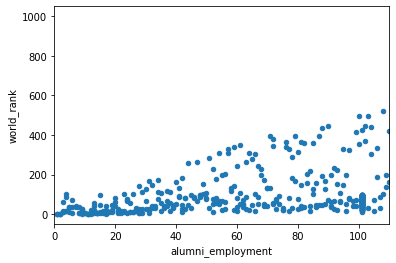

In [12]:
#graph5 checkign if the placements affect the rank or not
data.plot(y='world_rank', x = 'alumni_employment', kind='scatter', xlim=(0,110))

In [13]:
#determing the factors that affect the rank the most
data2015 = data[data.year==2015]
data2015.drop(['country','national_rank','year'],axis = 1, inplace = True)
data2015.head()

C:\Users\girish narayan.s\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,world_rank,institution,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
1200,1,Harvard University,1,1,1,1,1,1,3,100.00
1201,2,Stanford University,9,2,4,5,3,3,10,98.66
1202,3,Massachusetts Institute of Technology,3,11,2,15,2,2,1,97.54
1203,4,University of Cambridge,2,10,5,11,6,12,48,96.81
1204,5,University of Oxford,7,13,10,7,12,7,15,96.46


In [14]:
#has printed the top 5 ranks of the year 2015
y = data2015.quality_of_education.max() + 1 #y has the moximum valye of the quality of education 
y

368

In [15]:
#367 is highest value of the quality if eduaction

factor = list(data2015.columns.values)[2:9] #skippinh the frst two columns
factor

['quality_of_education',
 'alumni_employment',
 'quality_of_faculty',
 'publications',
 'influence',
 'citations',
 'patents']

In [16]:

#hypothesis testing
#H0:that there is no signiffcant difference between the quality of eduaction and the teaching 
##basically meaning that the quality of eduaction only depends on the teaching

In [18]:
df = pd.read_csv("C:/Users/girish narayan.s/Documents/r project/IDS DATASET.csv")
df[['quality_of_education','quality_of_faculty']].describe()
ttest,pval = stats.ttest_rel(df['quality_of_education'][1:100], df['quality_of_faculty'][1:100])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


0.00891987405902934
reject null hypothesis


In [41]:
#NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=['quality_of_education','alumni_employment','quality_of_faculty']
print('before normalization')
for col in cols:
    print(col,'mean',data[col].mean(),'\n',col,'variance',data[col].var())
for col in cols:
    values=data[[col]].values.astype(float)
    data[col]=pd.DataFrame(scaler.fit_transform(values))
print('after normalisation')
for col in cols:
    print(col,'mean',data[col].mean(),'\n',col,'variance',data[col].var())



before normalization
quality_of_education mean 275.10045454545457 
 quality_of_education variance 14868.168621894034
alumni_employment mean 357.1168181818182 
 alumni_employment variance 34886.48884844285
quality_of_faculty mean 178.8881818181818 
 quality_of_faculty variance 4102.515913018306
after normalisation
quality_of_education mean 0.7489083457526131 
 quality_of_education variance 0.11099292769188725
alumni_employment mean 0.629181657565047 
 alumni_employment variance 0.10889912737218227
quality_of_faculty mean 0.8197612065354004 
 quality_of_faculty variance 0.08712259578709544


In [42]:
#applying models now
score = data.score
train = data[factor] 
lab_enc = preprocessing.LabelEncoder()
score_encoded = lab_enc.fit_transform(score)

In [43]:
x_train, y_train, x_test, y_test = train_test_split(train,score_encoded,train_size = 0.9, random_state = 2)

In [44]:
#random forest claassifier
forest = RandomForestClassifier()
forest.fit(x_train,x_test) #this is where the model trains
y_pred = forest.predict(y_train)
y1 = lab_enc.inverse_transform(y_test)
y2 = lab_enc.inverse_transform(y_pred)

C:\Users\girish narayan.s\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



2

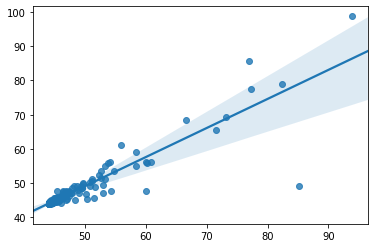

In [45]:
sns.regplot(y1,y2)
2#np.corrcoef(y1,y2)

In [46]:
#the shaded region represnts the predicted value
#calculating percentage accuarcy
fit = 0
for i in range(len(y1)):
    if (y1[i] - 0.5) <= y2[i] <= (y1[i] + 0.5):
        fit = fit + 1
        
print(fit/len(y1))

0.7090909090909091


In [47]:

#the end